In [2]:
!pip install yfinance
!pip install nltk
!pip install vaderSentiment
!pip install requests


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 126.0/126.0 kB 7.9 MB/s eta 0:00:00


In [33]:
# Collect Stock Data
import yfinance as yf
import pandas as pd
from datetime import datetime, timedelta
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
import matplotlib.pyplot as plt
import requests

# Specify the start and end dates
start_date = "2025-02-05"
end_date = datetime.now().strftime('%Y-%m-%d')

# Collect Tesla stock data from the specified date range
tesla_stock = yf.Ticker("TSLA")
stock_data = tesla_stock.history(start=start_date, end=end_date)
stock_data.reset_index(inplace=True)
stock_data.head()


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-02-05 00:00:00-05:00,387.510010,388.390015,375.529999,378.170013,57223300,0.0,0.0
1,2025-02-06 00:00:00-05:00,373.029999,375.399994,363.179993,374.320007,77918200,0.0,0.0
2,2025-02-07 00:00:00-05:00,370.190002,380.549988,360.339996,361.619995,70298300,0.0,0.0
3,2025-02-10 00:00:00-05:00,356.209991,362.700012,350.510010,350.730011,77514900,0.0,0.0
4,2025-02-11 00:00:00-05:00,345.799988,349.369995,325.100006,328.500000,118543400,0.0,0.0


In [34]:
stock_data


,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits
0,2025-02-05 00:00:00-05:00,387.510010,388.390015,375.529999,378.170013,57223300,0.0,0.0
1,2025-02-06 00:00:00-05:00,373.029999,375.399994,363.179993,374.320007,77918200,0.0,0.0
2,2025-02-07 00:00:00-05:00,370.190002,380.549988,360.339996,361.619995,70298300,0.0,0.0
3,2025-02-10 00:00:00-05:00,356.209991,362.700012,350.510010,350.730011,77514900,0.0,0.0
4,2025-02-11 00:00:00-05:00,345.799988,349.369995,325.100006,328.500000,118543400,0.0,0.0
...,...,...,...,...,...,...,...,...
74,2025-05-22 00:00:00-04:00,331.899994,347.269989,331.390015,341.040009,97113400,0.0,0.0
75,2025-05-23 00:00:00-04:00,337.920013,343.179993,333.209991,339.339996,84654800,0.0,0.0
76,2025-05-27 00:00:00-04:00,347.350006,363.790009,347.320007,362.890015,120146400,0.0,0.0
77,2025-05-28 00:00:00-04:00,364.839996,365.000000,355.910004,356.899994,91404300,0.0,0.0


In [35]:
import requests
import pandas as pd
from datetime import datetime, timedelta

api_key = "e61bdf623580436a84e7d113bc8fa07b"  # <-- Put your NewsAPI API key here

url = 'https://newsapi.org/v2/everything'

# Parameters for the API request
params = {
    'q': 'Tesla',  # Search for Tesla news
    'from': (datetime.now() - timedelta(days=28)).strftime('%Y-%m-%d'),  # Last 28 days
    'sortBy': 'relevancy',
    'apiKey': api_key,
    'pageSize': 100,
    'language': 'en'
}

# Make the request
response = requests.get(url, params=params)
data = response.json()

# Check for errors
if data['status'] != 'ok':
    raise Exception(f"NewsAPI error: {data.get('message', 'Unknown error')}")

# Extract articles
articles = data['articles']

# Convert to DataFrame with only 'publishedAt' and 'title'
news_data = pd.DataFrame(articles)[['publishedAt', 'title']]
news_data.columns = ['date', 'headline']

# Optional: convert 'date' to datetime
news_data['date'] = pd.to_datetime(news_data['date'])

print(news_data.head())


                       date                                           headline
0 2025-05-27 19:15:18+00:00                Tesla continues to circle the drain
1 2025-05-07 15:05:58+00:00  Tesla’s cheaper RWD Model Y is now available i...
2 2025-05-08 10:13:23+00:00  Tesla finally calls it quits on Cybertruck ran...
3 2025-05-22 20:59:32+00:00  Xiaomi’s new PU7 spells trouble for Tesla in C...
4 2025-05-23 07:20:28+00:00  Xiaomi’s new YU7 spells trouble for Tesla in C...


In [36]:
news_data


,date,headline
0,2025-05-27 19:15:18+00:00,Tesla continues to circle the drain
1,2025-05-07 15:05:58+00:00,Tesla’s cheaper RWD Model Y is now available i...
2,2025-05-08 10:13:23+00:00,Tesla finally calls it quits on Cybertruck ran...
3,2025-05-22 20:59:32+00:00,Xiaomi’s new PU7 spells trouble for Tesla in C...
4,2025-05-23 07:20:28+00:00,Xiaomi’s new YU7 spells trouble for Tesla in C...
...,...,...
92,2025-05-17 11:06:33+00:00,Tesla's Cybertruck Is No Longer America’s Best...
93,2025-05-09 09:36:41+00:00,"Panasonic is cutting 10,000 jobs in a bid to b..."
94,2025-05-16 13:35:12+00:00,EV sales are surging globally — but growth in ...
95,2025-05-02 11:17:00+00:00,Elon Musk reportedly said last year he no long...


In [37]:
# Preprocess news headlines
nltk. download ('punkt_tab' )
nltk. download ('stopwords' )
stop_words = set (stopwords.words('english'))

def preprocess_text(text):
  words = word_tokenize(text)
  words = [word for word in words if word. isalpha ()]
  words = [word for word in words if word. lower () not in stop_words]
  return ' '.join(words)

news_data['cleaned_headline'] = news_data ['headline'].apply(preprocess_text)
# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
  score = analyzer.polarity_scores(text)
  return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [38]:
news_data


,date,headline,cleaned_headline,sentiment_score
0,2025-05-27 19:15:18+00:00,Tesla continues to circle the drain,Tesla continues circle drain,0.0000
1,2025-05-07 15:05:58+00:00,Tesla’s cheaper RWD Model Y is now available i...,Tesla cheaper RWD Model available US,0.0000
2,2025-05-08 10:13:23+00:00,Tesla finally calls it quits on Cybertruck ran...,Tesla finally calls quits Cybertruck range ext...,0.0000
3,2025-05-22 20:59:32+00:00,Xiaomi’s new PU7 spells trouble for Tesla in C...,Xiaomi new spells trouble Tesla China,-0.4019
4,2025-05-23 07:20:28+00:00,Xiaomi’s new YU7 spells trouble for Tesla in C...,Xiaomi new spells trouble Tesla China,-0.4019
...,...,...,...,...
92,2025-05-17 11:06:33+00:00,Tesla's Cybertruck Is No Longer America’s Best...,Tesla Cybertruck Longer America Electric Picku...,0.0000
93,2025-05-09 09:36:41+00:00,"Panasonic is cutting 10,000 jobs in a bid to b...",Panasonic cutting jobs bid boost efficiency,0.5719
94,2025-05-16 13:35:12+00:00,EV sales are surging globally — but growth in ...,EV sales surging globally growth North America...,0.1280
95,2025-05-02 11:17:00+00:00,Elon Musk reportedly said last year he no long...,Elon Musk reportedly said last year longer wan...,-0.0516


from matplotlib import pyplot as plt
news_data['sentiment_score'].plot(kind='hist', bins=20, title='sentiment_score')
plt.gca().spines[['top', 'right',]].set_visible(False)

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  xs = series['date']
  ys = series['sentiment_score']
  
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = news_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('sentiment_score')

from matplotlib import pyplot as plt
import seaborn as sns
def _plot_series(series, series_name, series_index=0):
  palette = list(sns.palettes.mpl_palette('Dark2'))
  counted = (series['date']
                .value_counts()
              .reset_index(name='counts')
              .rename({'index': 'date'}, axis=1)
              .sort_values('date', ascending=True))
  xs = counted['date']
  ys = counted['counts']
  plt.plot(xs, ys, label=series_name, color=palette[series_index % len(palette)])

fig, ax = plt.subplots(figsize=(10, 5.2), layout='constrained')
df_sorted = news_data.sort_values('date', ascending=True)
_plot_series(df_sorted, '')
sns.despine(fig=fig, ax=ax)
plt.xlabel('date')
_ = plt.ylabel('count()')

from matplotlib import pyplot as plt
news_data['sentiment_score'].plot(kind='line', figsize=(8, 4), title='sentiment_score')
plt.gca().spines[['top', 'right']].set_visible(False)

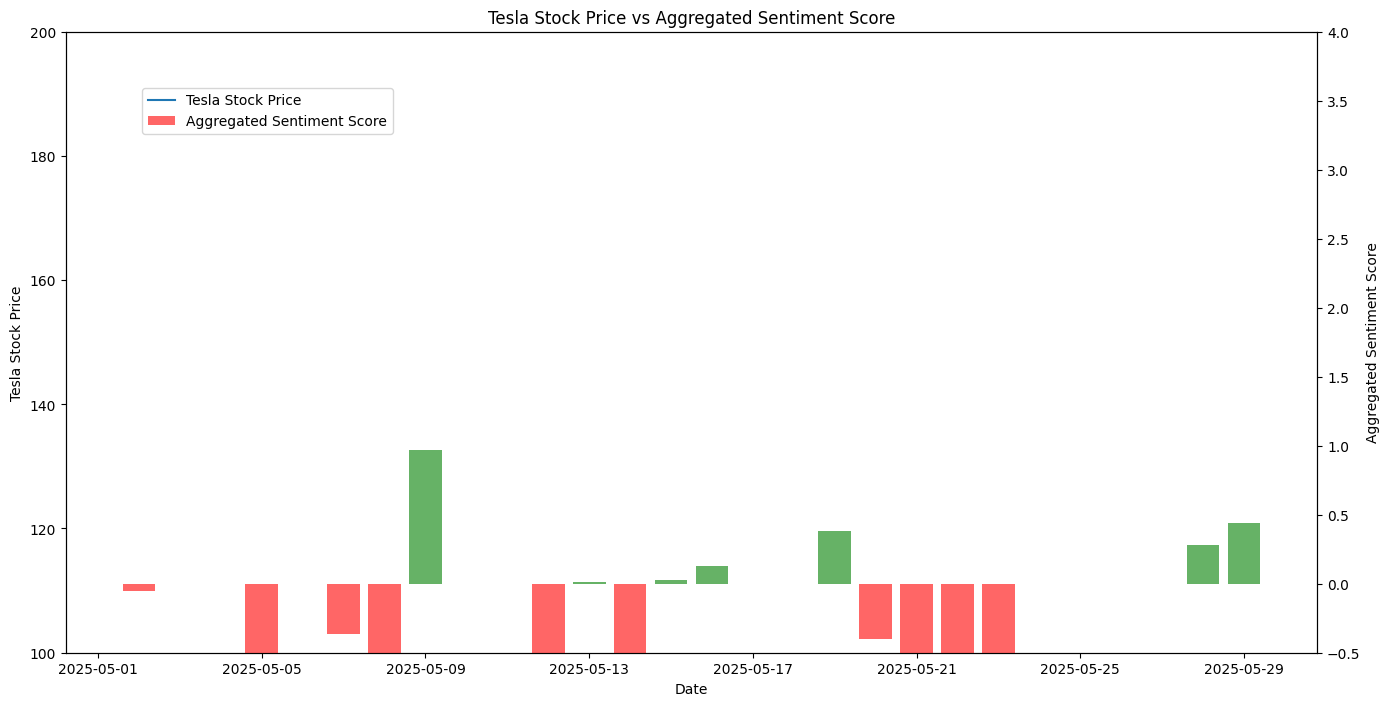

In [39]:
# Perform sentiment analysis
analyzer = SentimentIntensityAnalyzer()

def get_sentiment_score(text):
    score = analyzer.polarity_scores(text)
    return score['compound']

news_data['sentiment_score'] = news_data['cleaned_headline'].apply(get_sentiment_score)

# Convert dates to datetime format
news_data['date'] = pd.to_datetime(news_data['date']).dt.date
stock_data['Date'] = pd.to_datetime(stock_data['Date']).dt.date

# Aggregate sentiment scores by date
aggregated_sentiment = news_data.groupby('date')['sentiment_score'].sum().reset_index()

# Merge stock data with aggregated sentiment scores
combined_data = pd.merge(stock_data, aggregated_sentiment, left_on='Date', right_on='date', how='inner')

# Visualize the data with dual y-axis
fig, ax1 = plt.subplots(figsize=(14, 7))
ax1.set_xlabel('Date')
ax1.set_ylabel('Tesla Stock Price')
ax1.plot(combined_data['Date'], combined_data['Close'], label='Tesla Stock Price')
ax1.tick_params(axis='y')
ax1.set_ylim(100, 200)  # Set the left y-axis range

# Instantiate a second axes that shares the same x-axis
ax2 = ax1.twinx()
ax2.set_ylabel('Aggregated Sentiment Score')

# Use different colors for positive and negative bar values
colors = ['green' if val >= 0 else 'red' for val in combined_data['sentiment_score']]
ax2.bar(combined_data['Date'], combined_data['sentiment_score'], label='Aggregated Sentiment Score', color=colors, alpha=0.6)
ax2.tick_params(axis='y')
ax2.set_ylim(-0.5, 4)  # Set the right y-axis range

fig.tight_layout()
plt.title('Tesla Stock Price vs Aggregated Sentiment Score')
fig.legend(loc='upper left', bbox_to_anchor=(0.1, 0.9))
plt.show()
